### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#%run Visualizer.py # --allows for reloading the particular code

#### Train the network

In [2]:
n = 10
popsize = 20
generations = 200
name = 'centered5'
#device = torch.device('mps:0')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, popsize)

2023-02-14 15:20:38,475	INFO worker.py:1528 -- Started a local Ray instance.


[2023-02-14 15:20:40] INFO     <14398> evotorch.core: Instance of `Custom_NEProblem` (id:4420316240) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-02-14 15:20:40] INFO     <14398> evotorch.core: Instance of `Custom_NEProblem` (id:4420316240) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-02-14 15:20:40] INFO     <14398> evotorch.core: Instance of `Custom_NEProblem` (id:4420316240) -- The `device` of the problem is set as cpu
[2023-02-14 15:20:40] INFO     <14398> evotorch.core: Instance of `Custom_NEProblem` (id:4420316240) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-02-14 15:20:40] INFO     <14398> evotorch.core: Instance of `Custom_NEProblem` (id:4420316240) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0983)
    mean_eval : -1639.0660400390625
  median_eval : -1645.722900390625
pop_best_eval : -1577.680908203125

         iter : 2
     stepsize : ReadOnlyTensor(0.0969)
    mean_eval : -1520.849365234375
  median_eval : -1523.4188232421875
pop_best_eval : -1424.2076416015625

         iter : 3
     stepsize : ReadOnlyTensor(0.0955)
    mean_eval : -1553.766357421875
  median_eval : -1575.847412109375
pop_best_eval : -1427.9063720703125

         iter : 4
     stepsize : ReadOnlyTensor(0.0944)
    mean_eval : -1300.51904296875
  median_eval : -1428.6434326171875
pop_best_eval : -736.1435546875

         iter : 5
     stepsize : ReadOnlyTensor(0.0932)
    mean_eval : -977.5396728515625
  median_eval : -1011.236083984375
pop_best_eval : -422.63128662109375

         iter : 6
     stepsize : ReadOnlyTensor(0.0922)
    mean_eval : -469.00897216796875
  median_eval : -515.816650390625
pop_best_eval : -192.1002960205078

         iter : 7
  

In [4]:
network = trainer.get_trained_network()

In [5]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'])

#### Visualize trained network

In [6]:
organism = generate_organism(n, device)
graph = organism.toGraph()
visualizer = Visualizer()
network(graph, 0)

(Data(x=[40, 7], edge_index=[1, 0], device=cpu, attr=[1]),
 tensor([0., 0.]),
 0.0,
 0.0,
 0.0)

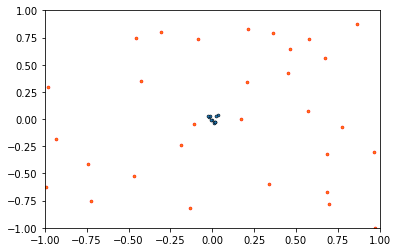

In [7]:
anim = visualizer.animate_organism(graph, network, food=30, frames=300)
visualizer.save_animation_to_gif(anim, name, 10)

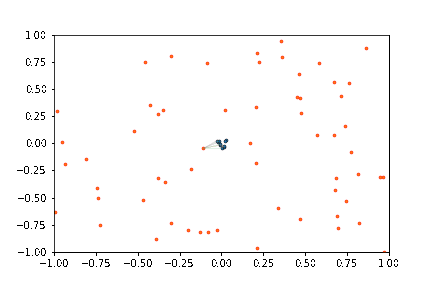

In [14]:
Image('../animation/' + name + '.gif')

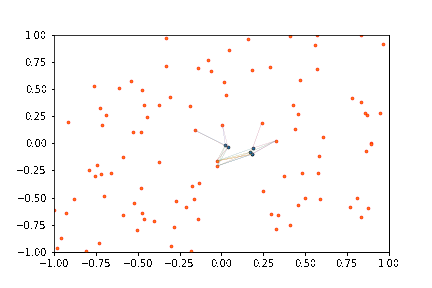

In [9]:
Image('../animation/GATConv1.gif')

In [10]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [11]:
print(network)

CGConv1(
  (conv_layers): CGConv(7, dim=4)
  (mlp): Sequential(
    (0): Linear(in_features=7, out_features=7, bias=True)
    (1): ReLU()
    (2): Linear(in_features=7, out_features=4, bias=True)
    (3): ReLU()
  )
)


In [12]:
print(network.conv_layers)
for param in network.conv_layers.parameters():
  print(param.data)

CGConv(7, dim=4)
tensor([[-0.0019,  0.0057, -0.3309, -0.2842, -0.3593, -0.7114,  0.5349, -0.8362,
          0.0186, -0.3995, -0.2963, -0.7320, -0.4587,  0.0953, -0.2229,  0.2223,
         -0.1836, -0.0414],
        [-0.5175,  0.0854,  0.1040, -0.3092,  0.2557, -0.0534,  0.5005, -0.7449,
          0.3024, -0.0024,  0.6159, -0.5876,  0.6332,  0.3050,  0.2675,  0.3298,
         -0.3806, -0.0204],
        [ 0.4010, -0.4392, -0.1113, -0.1125,  0.0371,  0.1197, -0.4585, -0.0546,
         -0.6667,  0.3086, -0.1683,  0.6131, -0.2121,  0.4543,  0.5052, -0.1520,
         -0.2271, -0.1802],
        [ 0.8811,  0.1898,  0.2460, -0.1367, -0.5514,  1.0127,  0.2059, -0.2892,
         -0.5610,  0.0593,  0.3736, -0.0849,  0.9787,  0.9667,  0.0939, -0.3169,
         -0.9429, -0.7050],
        [ 0.1869, -0.2599, -0.9882, -0.3540,  0.7124, -0.1631,  0.7268,  0.0484,
         -0.6703, -0.2980, -1.0004, -0.0988,  0.2139,  0.2271, -0.0831,  0.1308,
         -0.3378,  0.1161],
        [-0.3667, -0.0294,  0.624

In [13]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>